<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Crash-course-on-machine-learning" data-toc-modified-id="Crash-course-on-machine-learning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Crash course on machine learning</a></span><ul class="toc-item"><li><span><a href="#Supervised-and-unsupervised-learning" data-toc-modified-id="Supervised-and-unsupervised-learning-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Supervised and unsupervised learning</a></span></li><li><span><a href="#General-framework-of-supervised-learning" data-toc-modified-id="General-framework-of-supervised-learning-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>General framework of supervised learning</a></span></li><li><span><a href="#Predictive-validity-vs.-goodness-of-fit" data-toc-modified-id="Predictive-validity-vs.-goodness-of-fit-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Predictive validity vs. goodness-of-fit</a></span></li><li><span><a href="#Underfitting-and-overfitting" data-toc-modified-id="Underfitting-and-overfitting-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Underfitting and overfitting</a></span></li><li><span><a href="#K-fold-cross-validation-example" data-toc-modified-id="K-fold-cross-validation-example-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>K-fold cross-validation example</a></span></li><li><span><a href="#Gradient-descent" data-toc-modified-id="Gradient-descent-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Gradient descent</a></span></li><li><span><a href="#Exercise-time:-Implementing-GD" data-toc-modified-id="Exercise-time:-Implementing-GD-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span><span style="color: blue">Exercise time: Implementing GD</span></a></span></li><li><span><a href="#Stochastic-gradient-descent" data-toc-modified-id="Stochastic-gradient-descent-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Stochastic gradient descent</a></span></li></ul></li></ul></div>

In [284]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# We need this in order to suppress scientific notation in the standard output
np.set_printoptions(suppress=True)

# Crash course on machine learning

<p>In this notebook, we will present a short and general overview of core machine learning techniques and principles. You will also implement gradient descent in Python, which is one of the most important optimization algorithms in machine learning.</p>
<p>We will underscore the difference in perspective between machine learning and standard statistical modeling and define the steps of creating a machine learning algorithm.</p>
<p>The key ideas we will cover here are:</p>

1. Function approximation
2. Loss functions
3. Predictive validity vs. goodness-of-fit
4. Capacity, overfitting and underfitting
5. Cross-validation
6. Basic iterative optimization


<p>Parts of this notebook are based on the excellent notebook of Tal Yarkoni, available as a supplementary material to the Yarkoni & Westfall paper (2016).</p>
https://github.com/tyarkoni/PPS2016/blob/master/notebooks/Python.ipynb

## Supervised and unsupervised learning

<p><strong>Supervised learning</strong> algorithms learn to associate some input to some output given a sample of input-output pairs $\{\mathbf{x}^{(i)}, \mathbf{y}^{(i)}\}^{N}_{i=1}$. Example are linear regression, support vector machines, MLPs, random forests, etc...</p>

<p><strong>Unsupervised learning</strong> algorithms learn "useful" properties of the structure of a data sample $\{\mathbf{x}^{(i)}\}^{N}_{i=1}$. Examples are cluster analysis, KNN, PCA, autoencoders, etc...</p>

## General framework of supervised learning

<p>Let $\mathbf{x}$ be a measurable quantity (input).</p>
<p>Let $\mathbf{y}$ be a desirable quantity (output).</p>
<p>Goal: Find a function $\hat{\mathbf{y}}=f(\mathbf{x};\theta)$ which "best" maps $\mathbf{x}$ to $\mathbf{y}$.</p>
<p>Define a loss function $\mathcal{L}(\mathbf{y}, f(\mathbf{x};\theta))$ which penalizes the model when its predictions deviate from the true values of $\mathbf{y}$.</p>

<p>Learn parameters $\theta$ from the data (in the case of a parametric model):</p>
<br>
$$\hat{\theta} = \underset{\theta}{arg\,min}\frac{1}N\sum_{i=1}^N\mathcal{L}(\mathbf{y}_i, f(\mathbf{x}_i;\theta))$$



![Regression meme](./img/regression.jpg)

## Predictive validity vs. goodness-of-fit

<p>Breiman (2001) was among the first to draw the distinction between what he called the “data modeling” culture and the “algorithmic modeling” culture, and argue for the fruitfulness of the latter.</p> 

<p>Recently, Yarkoni and Westfall (2016) reopened the issue by appealing to a shift of focus from "explanation" to "prediction".</p>

<p>Both arguments point at an important issue: Using goodness-of-fit statistics on the training data does not tell us anything about the predictive validity of a model, i.e., its out-of-sample performance (generalizability). 
<p>Moreover, one can show that, due to the fact that we fit our model on the training set, the expected training error will be greater than or equal to the test error. Thus, <strong>to fit means to overfit</strong>.</p>

## Underfitting and overfitting
<p><strong>Underfitting</strong> occurs when the model is not able to obtain a sufficiently low error on the <em>training set</em>.</p>
<p><strong>Overfitting</strong> occurs when the model obtains a low training error but is not able to obtain a sufficiently low error on the <em>test set</em>.</p>
<p>Graphically, overfitting and underfitting look something like this:</p>

![Over vs. Under](https://cdn-images-1.medium.com/max/1600/1*SBUK2QEfCP-zvJmKm14wGQ.png)

<p>Underfitting and overfitting are closely related to two other concepts: <strong>capacity</strong> and the <strong>bias-variance tradeoff</strong>.</p>
<p>Capacity referes to the representational power of our model - how large is the family of functions we can approximate (in the case of linear models - linear functions, in the case of neural networks - all functions, at least in principle.</p>
<p>Here is a short illustration of the relationship between model capacity, over- and underfitting.</p>

![Represent](https://djsaunde.files.wordpress.com/2017/07/bias-variance-tradeoff.png?w=1100)

<p>You have probably noticed two other concepts popping out in the figure: <strong>bias</strong> and <strong>variance</strong>.</p>
<p><strong>Bias</strong> refers to the error arising from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outcomes, which, in turn, leads to underfitting.</p>
<p><strong>Variance</strong> refers to the error arising from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs, which leads to overfitting.</p>
<p>Below is a memorable illustration of these two error sources:</p>

![image.png](https://qph.fs.quoracdn.net/main-qimg-a55358a5a12b02c3f71010c965a2c4dc)

<p>Now, how do we estimate the bias and variance of our models?</p>
<p><strong>In psychology, we simply don't!</strong></p>
<p>In machine learing, we randomly split our dataset into a training set and a test set, unleash our fitting on the training set and validate the model on the test set.</p>
<p>An even better, though computationally more intensivce procedure is <strong>K-fold cross-validation</strong>. Here, we randomly split our data set into <em>K</em> chunks, we fit <em>K</em> models on <em>K - 1</em> mini datasets and validate the model on the remaining chunk. Below is an illustration of K-fold cross-validation:</p>
![image.png](https://www.researchgate.net/profile/Kiret_Dhindsa/publication/323969239/figure/fig10/AS:607404244873216@1521827865007/The-K-fold-cross-validation-scheme-133-Each-of-the-K-partitions-is-used-as-a-test.ppm)

## K-fold cross-validation example
<p>In the following, we will implement K-fold cross validation on the 'diabetes dataset' from 

In [5]:
# Read data
df = pd.read_csv('./data/diabetes.csv', delimiter='\t')

In [7]:
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


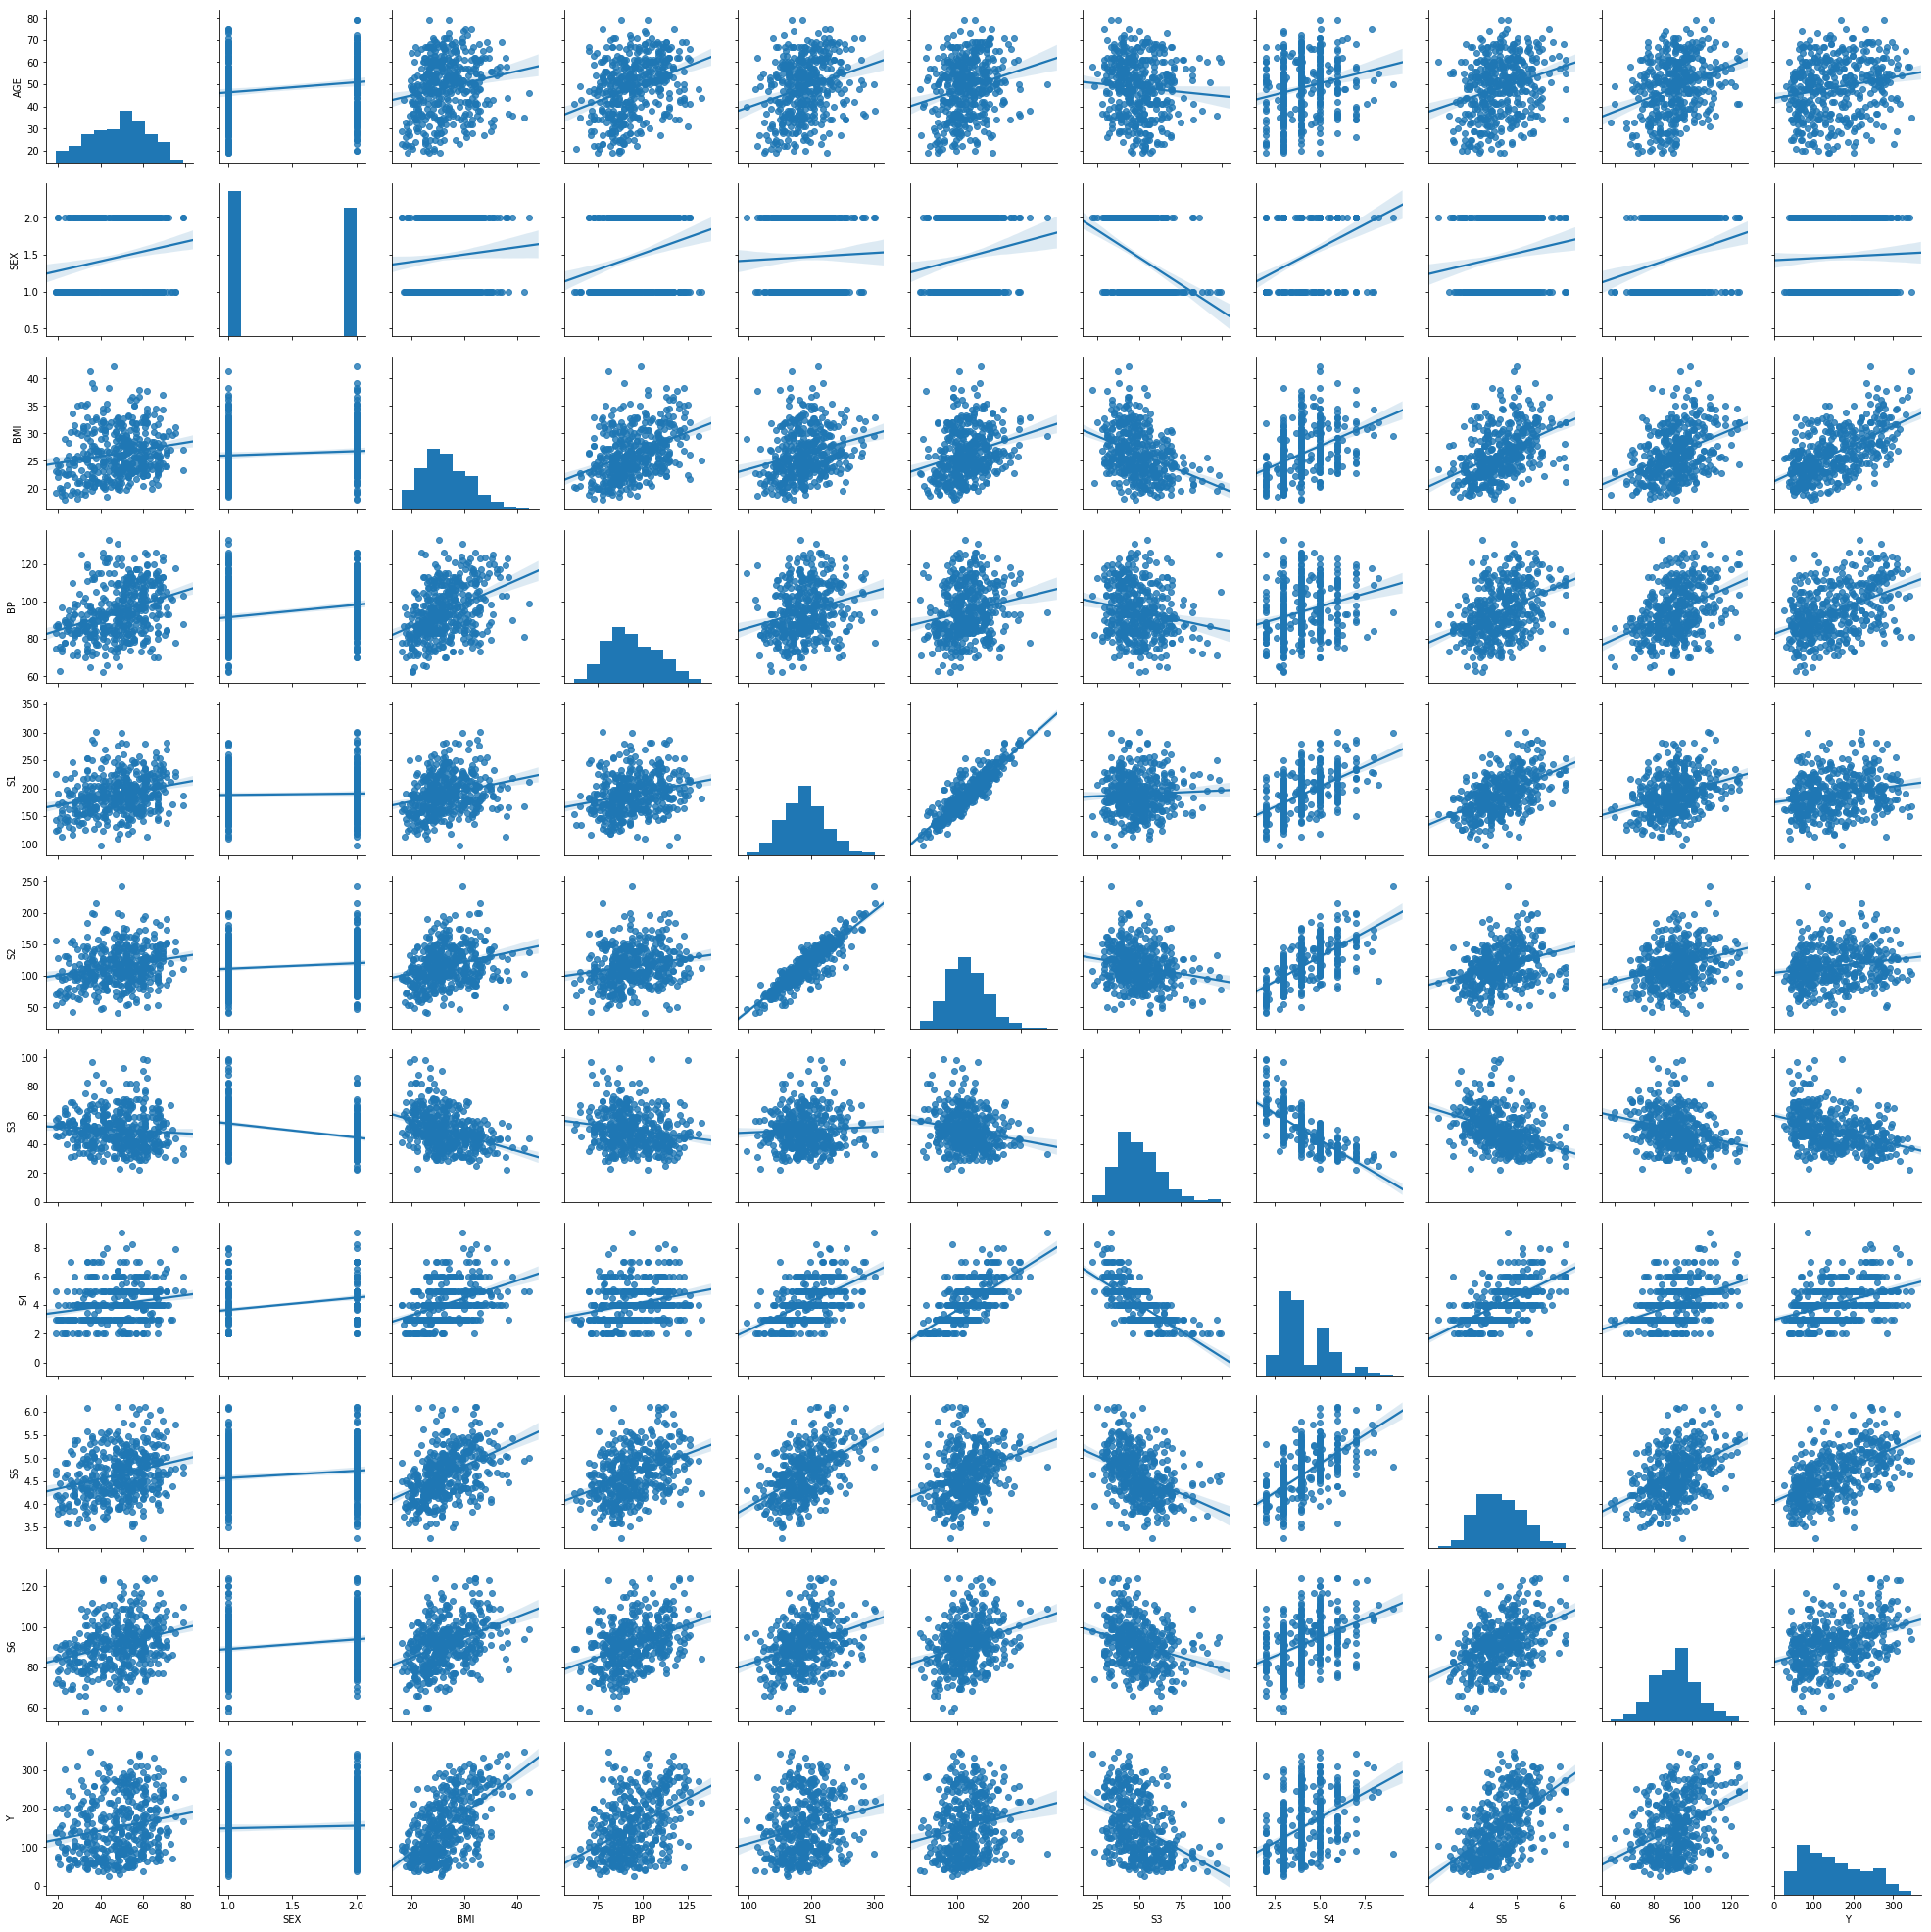

In [12]:
# And let's use of seaborn skills
sns.pairplot(df, kind='reg')

In [302]:
# Extract X and y from the pandas dataset as numpy arrays
X = df[['S1', 'S2', 'S3', 'S4', 'S5', 'S6']].as_matrix()
X = (X - X.mean(axis=0)) / X.std(axis=0)
X = np.c_[np.ones(len(df)), X]
y = df['Y'].as_matrix()

In [388]:
def k_fold_linreg(X, y, k_folds=10):
    """Implements k-fold cross-validation."""
    
    # Store number of observations
    N = X.shape[0]
    
    # Randomly shuffle data
    idx = np.random.permutation(X.shape[0])
    X_shuffled = X[idx]
    y_shuffled = y[idx]
    
    # Get k approximately equal splits
    X_splits =  np.array(np.array_split(X_shuffled, k_folds))
    y_splits = np.array(np.array_split(y_shuffled, k_folds))
    
    # Keep track of Rs and MSE
    metrics = {'train_R2': [], 
               'test_R2': [], 
               'train_RMSE': [], 
               'test_RMSE': []}
    
    
    # loop through folds
    for k in range(k_folds):
        
        # Extract current test folds
        X_k_test = X_splits[k]
        y_k_test = y_splits[k]
        
        # Extract current validation folds
        mask = np.ones(k_folds).astype('bool')
        mask[k] = 0
        X_k_train = np.vstack(X_splits[mask])
        y_k_train = np.hstack(y_splits[mask])
        
        assert X_k_train.shape[0] == y_k_train.shape[0], 'Size of arrays mismatch!'
        
        # Obtain parameters on training set
        betas = np.linalg.lstsq(X_k_train, y_k_train, rcond=None)[0]
        
        # Compute RMSE, R^2 on training and test sets
        
        # First compute sums of squares
        train_ss_tot = np.sum((y_k_train - np.mean(y_k_train))**2)
        train_ss_res = np.sum((y_k_train - X_k_train @ betas)**2)
        test_ss_tot = np.sum((y_k_test - np.mean(y_k_test))**2)
        test_ss_res = np.sum((y_k_test - X_k_test @ betas)**2)
        
        # Then compute R2 and RMSE
        metrics['train_R2'].append(1 - train_ss_res / train_ss_tot)
        metrics['test_R2'].append(1 - test_ss_res / test_ss_tot)
        metrics['train_RMSE'].append(np.sqrt(np.mean((y_k_train - X_k_train @ betas)**2)))
        metrics['test_RMSE'].append(np.sqrt(np.mean((y_k_test - X_k_test @ betas)**2)))
    return metrics

In [346]:
np.array(np.array_split(X, 2))[[True, False]].shape

(1, 221, 7)

In [372]:
a = np.array(np.array_split(y, 5))

In [381]:
np.hstack(a[[True, False, False, False, True]])

array([151,  75, 141, 206, 135,  97, 138,  63, 110, 310, 101,  69, 179,
       185, 118, 171, 166, 144,  97, 168,  68,  49,  68, 245, 184, 202,
       137,  85, 131, 283, 129,  59, 341,  87,  65, 102, 265, 276, 252,
        90, 100,  55,  61,  92, 259,  53, 190, 142,  75, 142, 155, 225,
        59, 104, 182, 128,  52,  37, 170, 170,  61, 144,  52, 128,  71,
       163, 150,  97, 160, 178,  48, 270, 202, 111,  85,  42, 170, 200,
       252, 113, 143,  51,  52, 210,  65, 141,  55, 134,  42, 272,  60,
        54, 221,  90, 311, 281, 182, 321,  58, 262, 206, 233, 242, 123,
       167,  63, 197,  71, 168, 140, 217, 121, 235, 245,  40,  52, 104,
       132,  88,  69, 219,  72, 201, 110,  51, 277,  63, 118,  69, 273,
       258,  43, 198, 242, 232, 175,  93, 168, 275, 293, 281,  72, 140,
       189, 181, 209, 136, 261, 113, 131, 174, 257,  55,  84,  42, 146,
       212, 233,  91, 111, 152, 120,  67, 310,  94, 183,  66, 173,  72,
        49,  64,  48, 178, 104, 132, 220,  57], dtype=int64)

## Gradient descent
<p>Most machine learning algorithms do not admit a nice closed-form minimizer of the loss function.</p>
<p>Thus, we need to resort to optimization procedure, which, under the appropriate conditions, will converge to a local minimum.</p>
<p><strong>Gradient descent</strong> is a generic iterative optimization algorithm used in numerous machine learning algorithms.</p>
<p>As the name suggests, gradient descent involves computing the local gradient of the loss function w.r.t. the parameter vector $\theta$ and then "nudging" the parameters towards the direction of steepest slope. The typical way to visualize gradient descent is via the ball-in-the-valley picture:</p>
![Gradient descent](https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_0402.png)
<p>Concretely, gradient descent using MSE loss consists of the following steps:</p>

1. Initialize the parameter vector $\theta^{(0)}$ with random starting values
2. <strong>for</strong> $t = 1$ to $n\_steps$
3. &nbsp;&nbsp;&nbsp;&nbsp;Update parameters: $\theta^{(t)} \leftarrow \theta^{(t-1)} - \alpha\nabla_{\theta}MSE$

<p>$\alpha$ is the most important hyperparameter of gradient descent. It controls the size of each step taken towards the direction of steepest descent.</p>
<p>Below is a nice illustration of what happens when the learning rate is too low or too high:</p>
![Learning rate](https://cdn-images-1.medium.com/max/1600/1*_EEOl5h56T2ZcXzH-Egahg.png)


<p>Now let's try to learn the parameters of a linear regression model on the Diabetes dataset. We will compare the solution found by gradient descent with the solution of the normal equation.</p>

## <span style="color:blue">Exercise time: Implementing GD</span> 

<p>In this exercise you will implement gradient descent for linear regression. Remember the general algorithmic expression for gradient descent:</p>
1. $\theta^{(0)} \leftarrow random\_values$ 
2. <strong>for</strong> $t = 1$ to $n\_steps$
3. &nbsp;&nbsp;&nbsp;&nbsp;$\theta^{(t)} \leftarrow \theta^{(t-1)} - \alpha\nabla_{\theta}MSE$

<p>Remembering the expression for the MSE loss:</p>
$$MSE(\theta) = \frac{1}N(y - \mathbf{X}\theta)^T(y - \mathbf{X}\theta)$$
<p>we can derive the gradient of the MSE error loss w.r.t $\theta$ as:</p>
$$\nabla_{\theta}MSE = \frac{2}{N}\mathbf{X}^T(\mathbf{X}\theta - y)$$

In [294]:
def gradient_descent(X, y, alpha=None, n_iter=None):
    """
    Implements gradient descent.
    X - an N-by-M design matrix of covariates
    y - an N-by-1 vector ot outcomes  
    alpha - learning rate
    n_iter - number of update steps to perform
    """
    
    np.random.seed(42)
    
    ### YOUR CODE HERE (~ 5-6 lines of code)
    pass

<p>We will work with numpy arrays, so we first preprocess our data.</p>
<p>Note, that we are also standardizing the features. Standardizing the features gives the error surface a more spherical shape (reduces curvature) which helps by guiding gradient descent directly towards a minimum. It also ensures that the learning step has an equal effect on each component of the gradient vector.</p>

<p>These are the parameters obtained by solving the normal equation.</p>

In [204]:
betas_ols = np.linalg.lstsq(X, y, rcond=None)[0]

<p>Now, make gradient descent converge to parameters consistent with the OLS solution. Play with the learning rate and number of iterations hyperparameter.</p>

In [205]:
betas_gd = None

<p>Use this cell to confirm convergence.</p>

In [212]:
for i in range(betas_ols.shape[0]):
    print('beta{} - OLS: {:.4f}, GD: {:.4f}'.format(i, betas_ols[i], betas_gd[i]))

Expected result:<br>
beta0 - OLS: 152.1335, GD: 152.1335<br>
beta1 - OLS: -42.7117, GD: -42.7117<br>
beta2 - OLS: 32.9893, GD: 32.9893<br>
beta3 - OLS: 1.0596, GD: 1.0596<br>
beta4 - OLS: -0.5886, GD: -0.5886<br>
beta5 - OLS: 50.9297, GD: 50.9297<br>
beta6 - OLS: 10.6488, GD: 10.64886<br>

## Stochastic gradient descent
<p>You have certainly noticed, that our previous implementation requires a complete pass through the whole training set. This is what's called "batch gradient descent". You can imagine that this get very slow when the training set is large.</p>
<p><strong>Stochastic gradient descent</strong>, on the other hand, picks a single instance at random at a given time step and computes the gradient based on this single instance.</p>
<p>This property makes <strong>stochastic gradient descent</strong> much faster, but introduces another issue due to the non-deterministic nature of the algorithm. Instead of descending directly towards the local minimum, the loss function will wander around and never settle down at a particular value. However, it will decrease on average. This makes the solution for the parameters more unstable.</p>
<p>This difference is illustrated below:</p>
![SGD vs GD](https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/09/GD-v-SGD.png?x31195)

<p>Now, let's implement stochastic gradient descent</p>

In [295]:
def sgd(X, y, alpha=0.05, n_iter=200, gamma=.5):
    """
    Implements stochastic gradient descent.
    X - an N-by-M design matrix of covariates
    y - an N-by-1 vector ot outcomes  
    alpha - learning rate
    n_iter - number of update steps to perform
    """
    
    np.random.seed(42)
    
    N = X.shape[0]
    betas = np.random.randn(X.shape[1])
    for t in range(n_iter):
        
        # Get a random permutation of indices
        indices = np.random.permutation(N)
        
        # loop through each training indices
        # and compute gradient based on given instance
        for i, idx in enumerate(indices):
            g = 2 * X[idx, :] * (X[idx, :] @ betas - y[idx])
            # This is called a learning rate scheduler
            scaled_alpha = alpha / (1 + gamma*(t+1))
            # Perform weight update
            betas -= scaled_alpha * g
    return betas

In [300]:
betas_sgd = sgd(X, y, n_iter=200, alpha=0.001)

In [301]:
# Print results
for i in range(betas_ols.shape[0]):
    print('beta{} - OLS: {:.4f}, SGD: {:.4f}'.format(i, betas_ols[i], betas_sgd[i]))

beta0 - OLS: 152.1335, SGD: 152.4055
beta1 - OLS: -42.7117, SGD: -33.0338
beta2 - OLS: 32.9893, SGD: 25.8376
beta3 - OLS: 1.0596, SGD: -4.4741
beta4 - OLS: -0.5886, SGD: -0.6071
beta5 - OLS: 50.9297, SGD: 48.3251
beta6 - OLS: 10.6488, SGD: 11.7562


<p>The middle ground between batch gradient descent and stochastic gradient descent is <strong>mini-batch</strong> gradient descent. Mini-batch gradient descent seeks to find a balance between the scaleability of stochastic gradient descent and the efficiency of batch gradient descent. It is the most common implementation of gradient descent used in the field of deep learning. We will look at it when we cover deep learning in our next notebook!</p>